# 載入資料

In [1]:
from keras.utils import np_utils # 因為後續要將label 標籤轉成one-hot encoding
# 匯入Keras 模組
from keras.datasets import mnist

import numpy as np
np.random.seed(10)

In [2]:
(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()

In [3]:
print('train data=',len(X_train_image))
print('test data=',len(X_test_image))

train data= 60000
test data= 10000


In [4]:
print('X_train_image',X_train_image.shape)
print('y_train_label',y_train_label.shape)

X_train_image (60000, 28, 28)
y_train_label (60000,)


# 觀察dataset

In [5]:
# 顯示數字影像
import matplotlib.pyplot as plt
def plot_image(image):
    # 設定圖型大小
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    # 傳入參數是28X28的圖形
    # cmap參數設定為binary 以黑白灰階顯示
    plt.imshow(image,cmap= 'binary')
    plt.show()

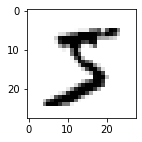

In [6]:
plot_image(X_train_image[0])

In [7]:
y_train_label[0]

5

In [8]:
#查看多筆訓練資料
def plot_images_labels_prediction(image, labels, prediction, idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5, i+1) #建立subgraph子圖形為5行5列
        ax.imshow(image[idx], cmap='binary') #畫出 subgraph 子圖形
        title = 'label=' + str(labels[idx]) # 設定子圖形title,顯示標籤欄位
        if len(prediction) > 0:
            title += ",predict="+str(prediction[idx]) # 標籤title加入預測結果
        ax.set_title(title,fontsize = 10) # 設定子圖形的標題title與大小
        ax.set_xticks([]); ax.set_yticks([]) #設定不顯示刻度
        idx += 1
    plt.show()

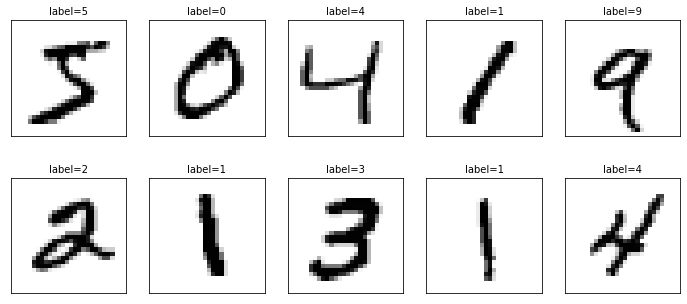

In [9]:
plot_images_labels_prediction(X_train_image,y_train_label,[],0,10)

In [10]:
# 查看test dataset
print('X_test_image:',X_test_image.shape)
print('y_test_label:',y_test_label.shape)

X_test_image: (10000, 28, 28)
y_test_label: (10000,)


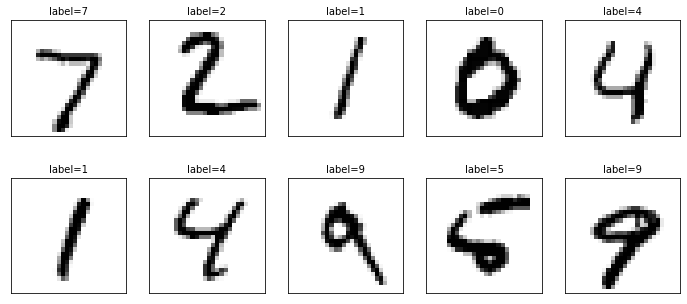

In [11]:
plot_images_labels_prediction(X_test_image,y_test_label,[],0,10)

# Ｍultilayer perceptron(多層感知器)

### 資料前處理

### features 
- 將原本 28X28 數字影像，以reshape轉換為1維向量，其長度是784，並且轉換為float.
- 數字影像image的數字標準化

In [12]:
print('X_train_image:', X_train_image.shape)
print('y_train_image:',y_train_label.shape)

X_train_image: (60000, 28, 28)
y_train_image: (60000,)


In [13]:
X_Train = X_train_image.reshape(60000,784).astype('float32')
X_Test = X_test_image.reshape(10000,784).astype('float32')
print('X_Train:',X_Train.shape)
print('X_Test:',X_Test.shape)

X_Train: (60000, 784)
X_Test: (10000, 784)


In [14]:
# X_train_image[0]
# 大部分數字是 0,少部分是數字,每一個數字是由0至255,代表圖形每一個點的灰階的深淺

In [15]:
# 數字標準化
X_Train_normalize = X_Train / 255
X_Test_normalize = X_Test / 255
# X_Train_normalize[0]

### labels
- one hot encoding

In [16]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 建立模型

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
model = Sequential() # 建立Sequential()模型,線性堆疊模型,後續只要使用model.add()方法，將個神經網絡加入模型即可

2022-01-30 12:53:57.272973: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.add(Dense(units = 256, input_dim = 784, kernel_initializer='normal', activation='relu'))

Dense: 上一層與下一層完全連結
- 隱藏層神經元：256
- 輸入層:784
- normal distribution初始化weight,bias
- activation: relu

In [21]:
model.add(Dense(units = 10, kernel_initializer='normal',activation='softmax'))

Dense: 上一層與下一層完全連結

- (input-dim = 256)
- 輸出層神經元：10
- normal distribution初始化weight,bias
- activation: softmax -> 神經元的輸出，轉換為預測每一個的機率 

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## 模型訓練

In [23]:
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

- loss : loss function, 在深度學習通常使用cross_entropy訓練的效果較好。
- optimizer : 設定訓練時的最優化方法，在深度學習使用adam最優化方法，可以讓訓練更快收斂，提高準確率
- metrics: 評估的方式是accuracy

In [24]:
train_history = model.fit(x= X_Train_normalize, y = y_TrainOneHot, validation_split = 0.2, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 1s - loss: 0.4388 - accuracy: 0.8828 - val_loss: 0.2166 - val_accuracy: 0.9411 - 692ms/epoch - 3ms/step
Epoch 2/10
240/240 - 0s - loss: 0.1948 - accuracy: 0.9442 - val_loss: 0.1567 - val_accuracy: 0.9553 - 349ms/epoch - 1ms/step
Epoch 3/10
240/240 - 0s - loss: 0.1389 - accuracy: 0.9600 - val_loss: 0.1312 - val_accuracy: 0.9626 - 364ms/epoch - 2ms/step
Epoch 4/10
240/240 - 0s - loss: 0.1065 - accuracy: 0.9687 - val_loss: 0.1141 - val_accuracy: 0.9672 - 349ms/epoch - 1ms/step
Epoch 5/10
240/240 - 0s - loss: 0.0844 - accuracy: 0.9758 - val_loss: 0.1014 - val_accuracy: 0.9697 - 350ms/epoch - 1ms/step
Epoch 6/10
240/240 - 0s - loss: 0.0673 - accuracy: 0.9813 - val_loss: 0.0902 - val_accuracy: 0.9736 - 358ms/epoch - 1ms/step
Epoch 7/10
240/240 - 0s - loss: 0.0563 - accuracy: 0.9841 - val_loss: 0.0955 - val_accuracy: 0.9728 - 350ms/epoch - 1ms/step
Epoch 8/10
240/240 - 0s - loss: 0.0461 - accuracy: 0.9877 - val_loss: 0.0829 - val_accuracy: 0.9750 - 350ms/epoch - 1ms/step


使用 model.fit 進行訓練，訓練過程會儲存在train_history變數


In [25]:
# 建立 show_train_history 顯示訓練過程
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc="upper left")
    plt.show()

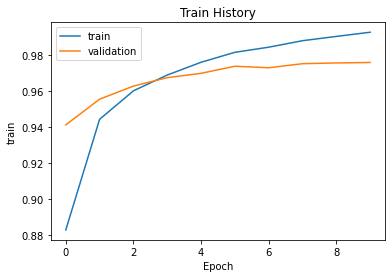

In [26]:
show_train_history(train_history,'accuracy','val_accuracy')

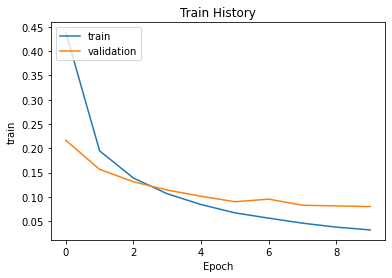

In [27]:
show_train_history(train_history,'loss','val_loss')

In [28]:
scores = model.evaluate(X_Test_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9777

accuracy= 0.9776999950408936


## 預測模型

In [29]:
# prediction = model.predict_classes(X_Test)
predict_x=model.predict(X_Test_normalize) 
prediction=np.argmax(predict_x,axis=1)

In [30]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

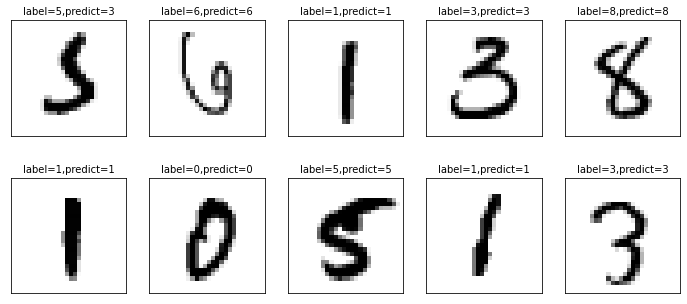

In [31]:
plot_images_labels_prediction(X_test_image, y_test_label, prediction, idx=340)

# 混淆矩陣

In [32]:
import pandas as pd
pd.crosstab(y_test_label, prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,1,1,1,1,4,1,2,1
1,0,1127,4,0,0,1,2,0,1,0
2,2,1,1013,5,1,0,2,4,4,0
3,0,0,2,998,0,1,0,2,3,4
4,0,0,3,1,952,0,5,3,2,16
5,3,0,0,12,1,859,8,1,3,5
6,5,2,2,1,4,3,941,0,0,0
7,0,4,11,5,0,0,0,1003,0,5
8,3,0,6,13,2,4,1,5,938,2


- "1" 最不容易混淆
- '5' 最容易混淆
- '5' 容易混淆為'3'

In [33]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [34]:
df[(df.label==7)&(df.predict==1)]

,label,predict
1260,7,1
1500,7,1
3838,7,1
6576,7,1


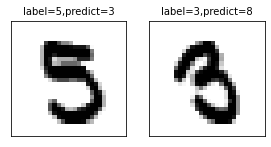

In [35]:
plot_images_labels_prediction(X_test_image,y_test_label,prediction,idx=5972,num=2)

## 隱藏層增加為1000個神經元 & Dropout

In [36]:
from keras.layers import Dropout

In [37]:
model = Sequential()
model.add(Dense(units = 1000, input_dim = 784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, kernel_initializer='normal',activation='softmax'))
model.summary()
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x= X_Train_normalize, y = y_TrainOneHot, validation_split = 0.2, epochs=10, batch_size=200, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
240/240 - 1s - loss: 0.3491 - accuracy: 0.8951 - val_loss: 0.1612 - val_accuracy: 0.9543 - 1s/epoch - 6ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1584 - accuracy: 0.9535 - val_loss: 0.1208 - val_accuracy: 0.9648 - 962ms/epoch - 4ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1143 - accuracy: 0.9668 - val_l

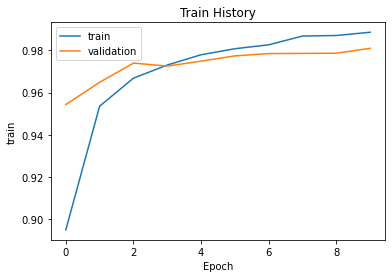

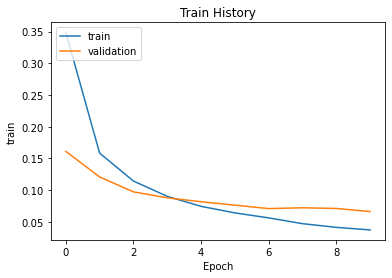

313/313 [==============================] - 0s 1ms/step - loss: 0.0611 - accuracy: 0.9813

accuracy= 0.9812999963760376


In [38]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')
scores = model.evaluate(X_Test_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

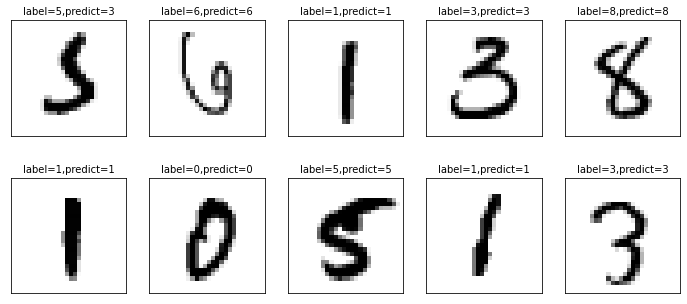

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,1,1,0,1,1,2,0
1,0,1123,3,0,0,0,2,0,7,0
2,2,1,1016,1,1,0,2,4,5,0
3,0,0,1,996,0,2,0,4,3,4
4,1,0,4,1,955,0,2,2,2,15
5,2,0,0,12,1,863,5,1,6,2
6,5,2,0,1,4,4,940,0,2,0
7,0,4,7,2,0,0,0,1007,1,7
8,1,0,3,4,2,1,2,3,951,7


In [39]:
# prediction = model.predict_classes(X_Test)
predict_x=model.predict(X_Test_normalize) 
prediction=np.argmax(predict_x,axis=1)
plot_images_labels_prediction(X_test_image, y_test_label, prediction, idx=340)
# import pandas as pd
pd.crosstab(y_test_label, prediction,rownames=['label'],colnames=['predict'])

## 建立兩個隱藏層

In [40]:
model = Sequential()
model.add(Dense(units = 1000, input_dim = 784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1000, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, kernel_initializer='normal',activation='softmax'))
model.summary()
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x= X_Train_normalize, y = y_TrainOneHot, validation_split = 0.2, epochs=10, batch_size=200, verbose=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                10010     
                                                                 
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
240/240 - 3s - loss: 0.3670 - acc

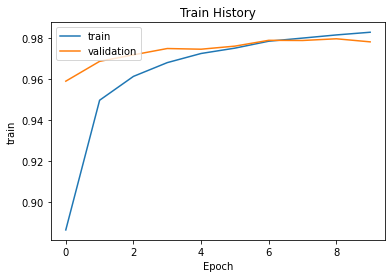

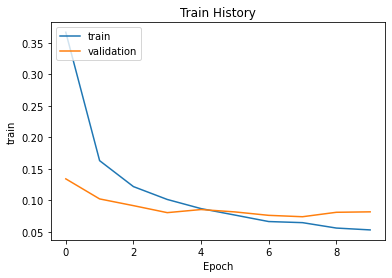

313/313 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9814

accuracy= 0.9814000129699707


In [41]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')
scores = model.evaluate(X_Test_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

- accuracy 並沒有顯著提升
- Multilayer perceptron,並且嘗試將模型加寬,加深,以提高準確率,並且加入Drop層,以避免overfitting. 
- Accuracy 約 0.98